# 🧠 Mental Health in Tech – Data Analytics Project
#### This project explores mental health trends among tech professionals using a survey dataset. It includes data cleaning, exploratory analysis, visualizations, and SQL queries to uncover actionable insights and recommendations.

## 🔗 Table of Contents
1. Introduction
2. Data Cleaning
3. Exploratory Analysis (Python)
4. SQL Insights
5. Final Summary & Business Recommendations

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/survey.csv')

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

### Checking for Null Values

In [5]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

### Dropping the irrelevant columns

In [6]:
df.drop(['state','comments'],axis =1, inplace = True) 

In [7]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

### Filling missing Values

In [8]:
df['self_employed'] = df['self_employed'].fillna('Prefer not to say')

In [9]:
df['work_interfere'] = df['work_interfere'].fillna("Don't Know")

In [10]:
df.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

### Checking the values in age column & keeping it between 18 and 65

In [11]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [12]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 65)].copy()

In [13]:
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61])

### Checking for Gender column and converting all the diiferent value of same class into one

In [14]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [15]:
# Convert to lowercase and strip whitespace
df['Gender'] = df['Gender'].str.lower().str.strip()

# Define Mappings
male_terms = ['male', 'm', 'man', 'male-ish', 'cis male', 'cis man', 'msle', 'mal', 'maile', 'male (cis)', 'make', 'malr', 'mail', 'guy (-ish) ^_^', 'ostensibly male, unsure what that really means']
female_terms = ['female', 'f', 'woman', 'cis female', 'cis-female/femme', 'femake', 'female (cis)', 'female (trans)', 'trans-female', 'trans woman', 'female ']
other_terms = ['non-binary', 'queer', 'queer/she/they', 'fluid', 'genderqueer', 'neuter', 'androgyne', 'agender', 'something kinda male?', 'male leaning androgynous', 'nah', 'enby']

# Map Terms
def clean_gender(g):
    if g in male_terms:
        return 'male'
    elif g in female_terms:
        return 'female'
    elif g in other_terms:
        return 'other'
    else:
        return 'other'

df['Gender'] = df['Gender'].apply(clean_gender)

In [16]:
df['Gender'].value_counts()

Gender
male      988
female    249
other      13
Name: count, dtype: int64

## Checking for duplicate values

In [17]:
df.duplicated().sum()

np.int64(0)

### Checking the unique values in each column to convert it into categorical type

In [18]:
df[['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees','remote_work', 'tech_company', 'benefits', 'care_options',
'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 
'phys_health_interview', 'mental_vs_physical', 'obs_consequence']].apply(pd.Series.unique)

Gender                                                   [female, male, other]
Country                      [United States, Canada, United Kingdom, Bulgar...
self_employed                                     [Prefer not to say, Yes, No]
family_history                                                       [No, Yes]
treatment                                                            [Yes, No]
work_interfere                   [Often, Rarely, Never, Sometimes, Don't Know]
no_employees                 [6-25, More than 1000, 26-100, 100-500, 1-5, 5...
remote_work                                                          [No, Yes]
tech_company                                                         [Yes, No]
benefits                                                 [Yes, Don't know, No]
care_options                                               [Not sure, No, Yes]
wellness_program                                         [No, Don't know, Yes]
seek_help                                           

In [19]:
df['leave'].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

## Converting columns to Categorical

In [20]:
cat_columns = ['Gender', 'self_employed','family_history', 'treatment', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program',
'seek_help', 'anonymity', 'mental_health_consequence', 'phys_health_consequence', 'coworkers','supervisor', 'mental_health_interview', 'phys_health_interview',
'mental_vs_physical', 'obs_consequence', 'Country']

for column in cat_columns:
    df[column] = df[column].astype('category')

In [21]:
# Converting work_interfere to Categorical

from pandas.api.types import CategoricalDtype

order = ['Never', 'Rarely', 'Sometimes', 'Often', "Don't know"]
cat_type = CategoricalDtype(categories=order, ordered=True)

df['work_interfere'] = df['work_interfere'].astype(cat_type)

In [22]:
# Converting leave to categorical

order = ['Very difficult', 'Somewhat difficult', 'Somewhat easy', 'Very easy', "Don't know"]
cat_type = CategoricalDtype(categories=order, ordered=True)

df['leave'] = df['leave'].astype(cat_type)


### Adding a column based on Age group

In [23]:
def age_group(age):
    if age < 25:
        return '18–24'
    elif age < 35:
        return '25–34'
    elif age < 50:
        return '35–49'
    else:
        return '50+'

df['age_group'] = df['Age'].apply(age_group)


In [24]:
df.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group
0,2014-08-27 11:29:31,37,female,United States,Prefer not to say,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,35–49
1,2014-08-27 11:29:37,44,male,United States,Prefer not to say,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,35–49
2,2014-08-27 11:29:44,32,male,Canada,Prefer not to say,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,25–34
3,2014-08-27 11:29:46,31,male,United Kingdom,Prefer not to say,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,25–34
4,2014-08-27 11:30:22,31,male,United States,Prefer not to say,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,25–34


# EDA

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Overall Treatment Distribution

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3848\2107346664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'treatment', palette = 'Set2')


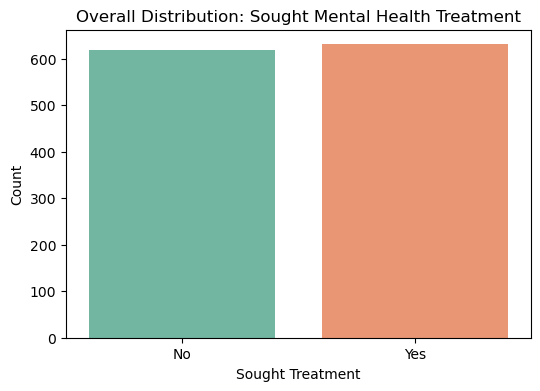

In [26]:
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'treatment', palette = 'Set2')
plt.title('Overall Distribution: Sought Mental Health Treatment')
plt.xlabel('Sought Treatment')
plt.ylabel('Count')
plt.show()

### Insight 1: Overall Mental Health Treatment Seeking

A count plot was created to analyze how many individuals in the tech industry have sought treatment for mental health issues.

**Observation:**
- The number of people who have sought treatment is slightly higher than those who have not.
- This suggests that mental health challenges are relatively widespread, and a notable portion of the tech workforce is actively seeking help.

**Implication:**
- Organizations should acknowledge this trend and consider improving mental health resources, as it is clearly a concern for many employees.

#### Gender vs Treatment

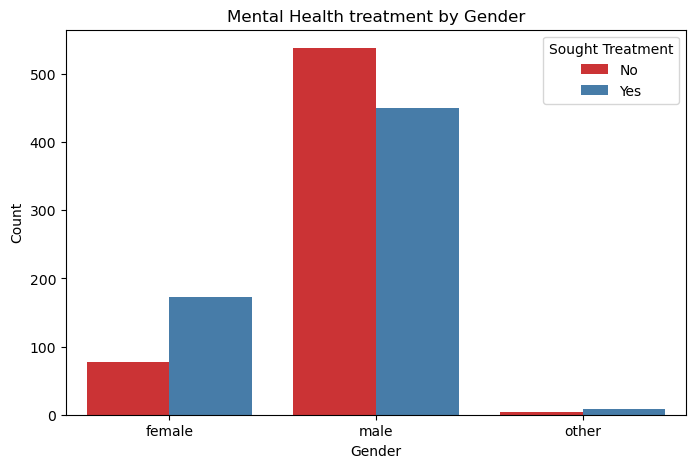

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'Gender', hue = 'treatment', palette = 'Set1')
plt.title('Mental Health treatment by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.show()

### Insight 2: Mental Health Treatment by Gender

A grouped count plot was created to examine how different gender identities seek mental health treatment.

🧠 **Observation:**
- Female employees appear to seek treatment **more** compared to male employees.
- Individuals identifying as "other" show **higher** treatment-seeking behavior, although their count is relatively smaller.

💡 **Implication:**
- Gender plays a role in how openly mental health challenges are addressed in tech.
- Companies may need to promote inclusive, gender-sensitive mental health programs to support all employees equally.


#### Treatment vs Age Group

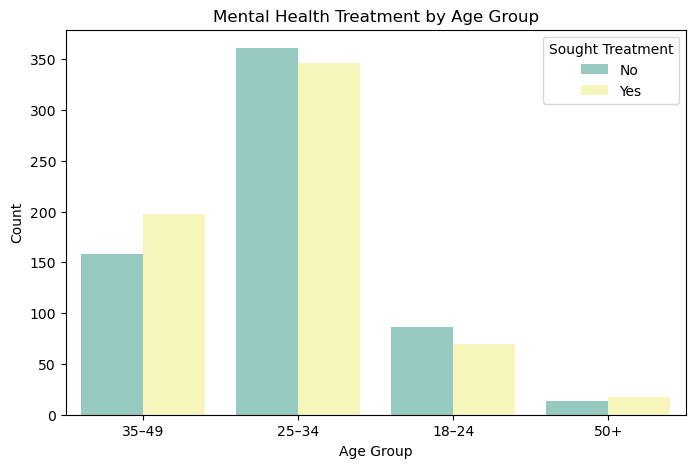

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='age_group', hue='treatment', palette='Set3')
plt.title('Mental Health Treatment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.show()

### Insight 3: Mental Health Treatment by Age Group

A count plot comparing age groups with treatment status was created to uncover age-based patterns in mental health behavior.

🧠 **Observation:**
- Individuals in the **35–49 age group** have the **highest number** of people who have sought treatment.
- In the **50+ group**, slightly more people are seeking treatment than not, indicating higher awareness or severity with age.
- For the **18–24** and **25–34** groups, the number of people **not seeking treatment** is **higher** than those who did.

💡 **Implication:**
- Younger professionals (under 35) may be **less likely to seek help**, possibly due to stigma, lack of awareness, or early career pressure.
- Middle-aged and older employees seem **more likely** to recognize and act on mental health needs.
- Organizations should **increase awareness campaigns targeted at younger staff** and ensure easy access to confidential support services.


#### Work Interference vs. Treatment

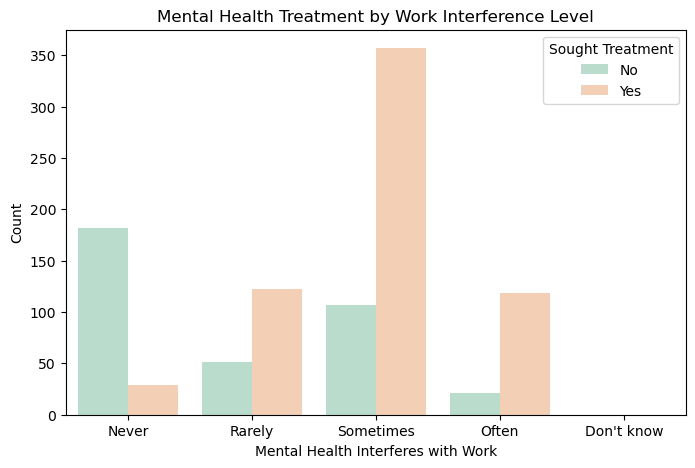

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='work_interfere', hue='treatment', palette='Pastel2')
plt.title('Mental Health Treatment by Work Interference Level')
plt.xlabel('Mental Health Interferes with Work')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.show()

### Insight 4: Work Interference vs. Treatment Seeking Behavior

This analysis explores the relationship between how often mental health interferes with work performance and whether individuals seek treatment.

🧠 **Observation:**
- In all categories where individuals reported that mental health **interferes with work** (`Rarely`, `Sometimes`, `Often`), **most people sought treatment**.
- Among those who answered **"Never"**, the majority did **not** seek treatment — likely because they did not perceive a need.
- The **"Don't know"** category had **no visible data**, possibly due to missing or cleaned-out responses.

💡 **Implication:**
- There is a **clear positive correlation**: as mental health interference with work increases, so does the likelihood of seeking treatment.
- This highlights that **work-related impact is a key motivator** for people to acknowledge and address mental health concerns.
- Companies should not wait until mental health affects productivity — they should offer preventive resources and early support channels.


### Company Support vs Mental Health Treatment

#### 1.Treatment vs Benefits

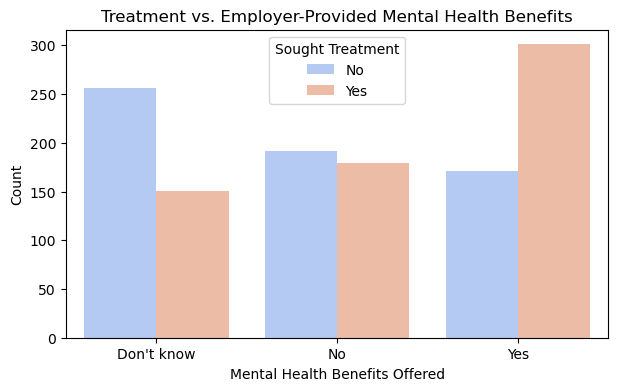

In [30]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='benefits', hue='treatment', palette='coolwarm')
plt.title('Treatment vs. Employer-Provided Mental Health Benefits')
plt.xlabel('Mental Health Benefits Offered')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.show()

#### 1. Employer-Provided Mental Health Benefits

🧠 **Observation:**
- Individuals whose employers **offer mental health benefits** are more likely to seek treatment compared to those who don't receive such support.
- Those without benefits show **lower treatment-seeking behavior**, possibly due to cost, accessibility, or lack of awareness.

💡 **Implication:**
- Providing mental health benefits is a **strong positive influence** on whether employees take action to address their mental health.
- Organizations must prioritize including mental health coverage in their benefits packages.


#### 2. Treatment vs. Care options

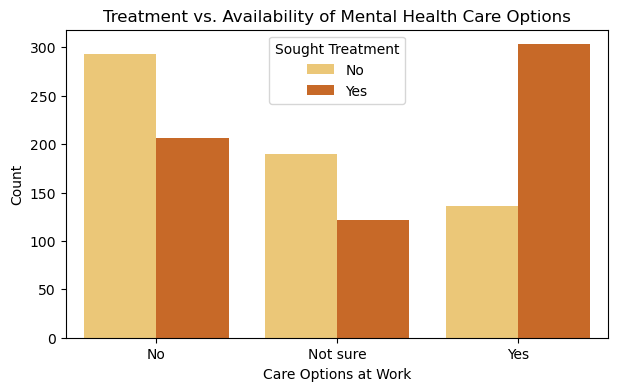

In [31]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='care_options', hue='treatment', palette='YlOrBr')
plt.title('Treatment vs. Availability of Mental Health Care Options')
plt.xlabel('Care Options at Work')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.show()

#### 2. Availability of Mental Health Care Options

🧠 **Observation:**
- A significant number of individuals who reported having **available care options at work** sought treatment.
- People without access to such care were **less likely** to seek help.

💡 **Implication:**
- Direct access to mental health care (e.g., counselors, support lines, programs) at the workplace boosts the chances that employees will seek support.
- Companies should consider implementing **on-site or remote care options** for mental well-being.


#### 3. Treatment vs. Anonymity

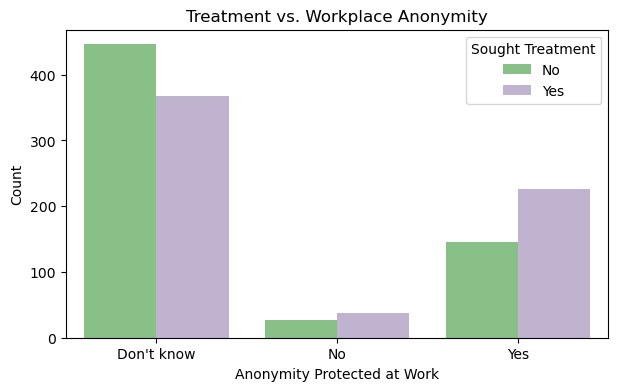

In [32]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='anonymity', hue='treatment', palette='Accent')
plt.title('Treatment vs. Workplace Anonymity')
plt.xlabel('Anonymity Protected at Work')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.show()

#### 3. Workplace Anonymity in Seeking Help

🧠 **Observation:**
- The most frequent response to whether anonymity is protected at work was **"Don't know."**
- Within this group, **a large portion did not seek treatment**, possibly due to **uncertainty or lack of trust** in the workplace environment.
- Compared to them, people who answered **"Yes"** to anonymity were more likely to seek treatment.

💡 **Implication:**
- **Uncertainty about workplace confidentiality discourages people from getting help.**
- Even more than saying “No,” not knowing whether it's safe to seek help creates **hesitation and fear**.
- Companies must **clearly communicate** their mental health policies and **guarantee anonymous access** to support systems.


#### Family History vs Treatment

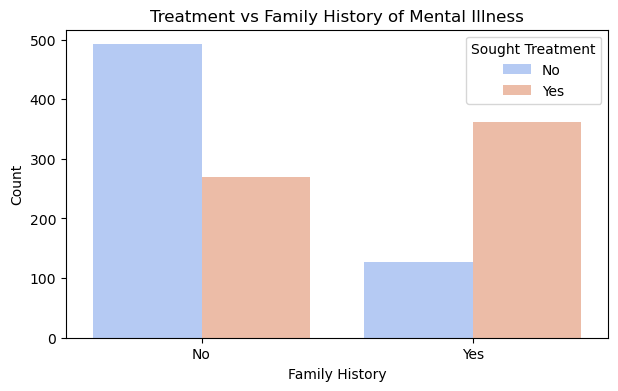

In [33]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='family_history', hue='treatment', palette='coolwarm')
plt.title('Treatment vs Family History of Mental Illness')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.show()

#### Additional Insight: Family History vs. Treatment

This analysis explores whether individuals with a **family history of mental illness** are more likely to seek treatment themselves.

🧠 **Observation:**
- A **large number of people** who reported having a family history of mental illness have **sought treatment**.
- Those **without a family history** show a **lower treatment-seeking rate**.
- This suggests a possible link between **awareness, early exposure**, or **less stigma** among those familiar with mental health issues.

💡 **Implication:**
- Family history plays a role in shaping attitudes toward mental health treatment.
- People with firsthand exposure to mental illness in their families may be **more open**, **better informed**, or **more proactive** in seeking help.
- Awareness campaigns could benefit from **peer storytelling** or **family-based messaging** to reduce stigma in others.


#### Self employed vs Treatment

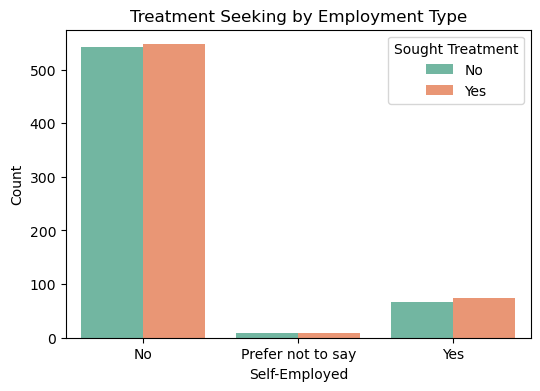

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='self_employed', hue='treatment', palette='Set2')
plt.title('Treatment Seeking by Employment Type')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.show()

#### Additional Insight: Employment Type and Treatment Seeking

This analysis compares treatment-seeking behavior across different types of employment: self-employed, salaried (non-self-employed), and those who preferred not to say.

🧠 **Observation:**
- For both **self-employed** and **non-self-employed** individuals, a **slightly higher number** sought treatment than those who did not.
- Among those who **preferred not to say**, the number of individuals who sought treatment and those who didn’t was **equal**.
- The treatment-seeking behavior appears **similar across employment types**, with **no strong disparity**.

💡 **Implication:**
- Mental health awareness may be **increasing across all types of employment**, not just in traditional jobs.
- However, the equal split in the "Prefer not to say" group may indicate **privacy concerns** or **lack of clarity/support** in certain employment contexts.
- Future policies and outreach should be inclusive of all working groups — **salaried, self-employed, and informal workers** alike.


#### Leave vs. Treatment

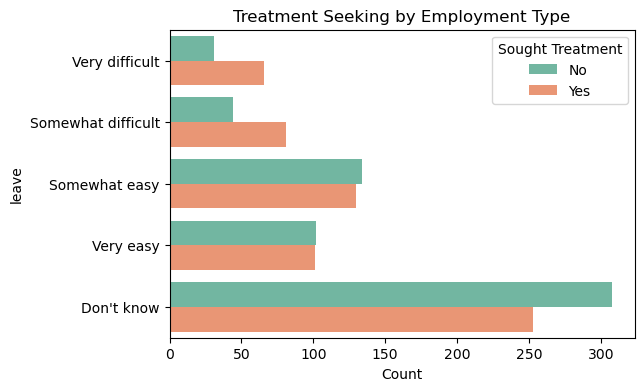

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, y='leave', hue='treatment', palette='Set2')
plt.title('Treatment Seeking by Employment Type')
plt.xlabel('Count')
plt.ylabel('leave')
plt.legend(title='Sought Treatment')
plt.show()

#### Additional Insight: Leave Policy vs. Treatment Seeking

This analysis explores how the perceived ease of taking a mental health leave influences an employee's decision to seek treatment.

🧠 **Observation:**
- In the groups where taking leave is perceived as **"very difficult" or "somewhat difficult"**, a **larger number of individuals** sought treatment. This may suggest that these individuals **pushed through obstacles** to get help, possibly indicating more severe needs or less organizational support.
- In the **"somewhat easy"** group, the number of people seeking treatment is **slightly lower** than those who didn’t.
- In the **"very easy"** category, the count of those who did and did not seek treatment is **approximately equal** — possibly due to early intervention or a more open culture.
- In the **"don't know"** group, **more people did not seek treatment**, indicating uncertainty or lack of clear policies may be a barrier.

💡 **Implication:**
- The results show that **clarity and flexibility of leave policies** can influence treatment decisions.
- Employees who are uncertain about or find it difficult to take leave may still seek help, but likely under greater stress or without organizational support.
- Companies should ensure **transparent and accessible leave policies**, and actively communicate them to reduce hesitation and promote mental well-being.


#### Gender vs. Treatment (Normalized as %)

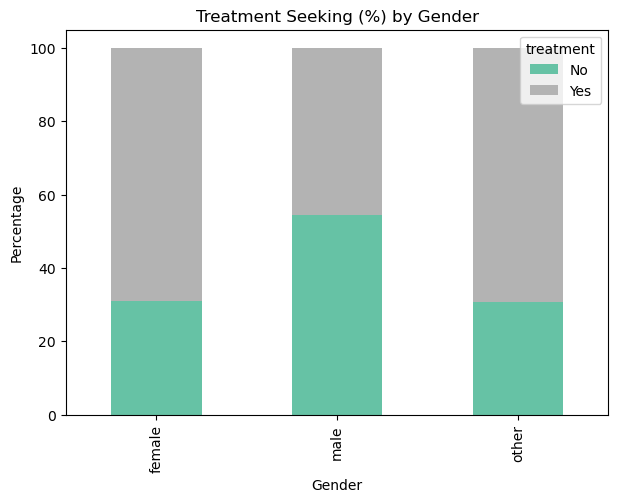

In [61]:
cross = pd.crosstab(df['Gender'], df['treatment'], normalize='index') * 100
cross.plot(kind='bar', stacked=True, figsize=(7,5), colormap='Set2')
plt.title("Treatment Seeking (%) by Gender")
plt.ylabel("Percentage")
plt.show()

#### Bonus Insight: Gender vs. Treatment (Normalized Percentage)

To understand the proportion of treatment-seeking behavior across different genders, a normalized (percentage-based) stacked bar chart was created.

🧠 **Observation:**
- A **larger proportion of females** sought treatment compared to males.
- The "other" gender category had a **diverse distribution**, but due to its smaller sample size, the percentages should be interpreted cautiously.
- Males had a **higher proportion** of individuals **not seeking treatment**, which could be influenced by social stigma or hesitation.

💡 **Implication:**
- Gender plays a role not just in raw counts, but also in **relative openness to seeking help**.
- This visualization highlights potential **gender-related barriers or attitudes** toward mental health support, which employers and policy makers should consider when designing inclusive well-being programs.


# Analysis Done using SQL

### Creating an In-Memory SQL database

In [38]:
import sqlite3

# Create a connection to in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('mental_health', conn, index=False, if_exists='replace')

1250

### Insights by using SQL

#### Total number of Responses

In [42]:
query = """
SELECT COUNT(*) AS total_responses
FROM mental_health;
"""
pd.read_sql_query(query, conn)

,total_responses
0,1250


#### 1. Total Number of Responses
We queried the total number of survey responses available in the dataset.

📌 **Insight:**
- The dataset contains a total of **1250** responses related to mental health in the tech industry.

#### Calculating the no of people seeking treatment

In [43]:
query1 = """
SELECT treatment, COUNT(*) AS count
FROM mental_health
GROUP BY treatment;
"""
pd.read_sql_query(query1, conn)

,treatment,count
0,No,619
1,Yes,631


#### 2. Number of People Who Sought Treatment
We calculated how many people reported seeking mental health treatment vs. those who didn’t.

🧠 **Insight:**
- 631 people seeked treatment while 619 didn't.
- The no of people seeking treatment is slightly higher compared to those who didn’t.
- This indicates growing awareness and willingness to address mental health issues in the tech community.

#### Treatment seeking by Gender

In [44]:
query2 = """
SELECT Gender, treatment, COUNT(*) AS count
FROM mental_health
GROUP BY Gender, treatment
ORDER BY Gender;
"""
pd.read_sql_query(query2, conn)

,Gender,treatment,count
0,female,No,77
1,female,Yes,172
2,male,No,538
3,male,Yes,450
4,other,No,4
5,other,Yes,9


#### 3. Treatment Seeking by Gender
This query helped us understand how treatment-seeking behavior varies across different gender identities.

💡 **Insight:**
- A higher proportion of **females** sought treatment compared to males.
- The **"other"** gender group had a mixed pattern, possibly due to fewer responses and varied lived experiences.
- Males had more individuals who did **not** seek treatment, suggesting potential stigma or hesitation.

#### Top 5 countries by Participation

In [50]:
query3 = """
SELECT Country, COUNT(*) AS responses
FROM mental_health
GROUP BY Country
ORDER BY responses DESC
LIMIT 5;
"""
pd.read_sql_query(query3, conn)

,Country,responses
0,United States,745
1,United Kingdom,184
2,Canada,72
3,Germany,45
4,Netherlands,27


#### 4. Top 5 Countries by Participation
We identified the top 5 countries with the highest number of participants.

🌍 **Insight:**
- The **United States**, **United Kingdom**, and **Canada** were the top contributors.
- These countries likely have more tech workers or higher survey visibility.
- The insights drawn may be more relevant to these countries due to the larger sample size.

#### Treatment rate on the basis of age group

In [55]:
query4 = """
SELECT age_group,
ROUND(SUM(CASE WHEN treatment = 'Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS treatment_rate_percent
FROM mental_health
GROUP BY age_group
ORDER BY age_group;
"""
pd.read_sql_query(query4, conn)

,age_group,treatment_rate_percent
0,18–24,44.87
1,25–34,48.94
2,35–49,55.62
3,50+,54.84


#### 4. Treatment Rate by Age Group (SQL-Based)

We calculated the percentage of individuals in each age group who reported seeking mental health treatment.

🧠 **Insight:**
- The **35–49 age group** has the **highest treatment-seeking rate** at 55.62%, followed closely by the **50+ group** at 54.84%.
- Younger respondents, especially those aged **18–24**, have the **lowest treatment rate** at 44.87%.
- The trend suggests that **older professionals may be more willing** to acknowledge and seek treatment for mental health issues, possibly due to increased awareness, experience, or access to benefits.
- Conversely, **younger employees** may face **stigma, denial, or lack of resources** despite being at risk — indicating a gap that employers and HR teams could address through education and support systems.

#### Treatment by Country (Top 10 by Participation)

In [54]:
query5 = """
SELECT Country,
SUM(CASE WHEN treatment = 'Yes' THEN 1 ELSE 0 END) AS treatment_yes,
SUM(CASE WHEN treatment = 'No' THEN 1 ELSE 0 END) AS treatment_no,
COUNT(*) AS total_responses
FROM mental_health
GROUP BY Country
ORDER BY total_responses DESC
LIMIT 10;
"""
pd.read_sql_query(query5, conn)

,Country,treatment_yes,treatment_no,total_responses
0,United States,407,338,745
1,United Kingdom,92,92,184
2,Canada,37,35,72
3,Germany,21,24,45
4,Netherlands,9,18,27
5,Ireland,13,14,27
6,Australia,13,8,21
7,France,2,11,13
8,India,3,7,10
9,New Zealand,5,3,8


#### 5. Treatment Summary by Country (Top 10 by Participation)

This analysis highlights the number of individuals who sought or did not seek treatment for mental health issues across the **top 10 countries** with the highest response rates.

🧠 **Insight:**
- The **United States** dominates the dataset in terms of participation and also has a relatively high number of people who sought treatment (407), though a large group (338) did not.
- In the **United Kingdom**, the number of people seeking and not seeking treatment is **exactly equal**, suggesting a balanced mental health landscape or mixed cultural/organizational support.
- Countries like **Canada** and **Australia** also show a fairly balanced distribution, with a slight lean toward seeking treatment.
- On the other hand, countries such as **France** and **India** show a much **lower number of individuals seeking help**, which could reflect stigma, lack of access, or less open workplace policies.
- While these results are not generalizable to entire populations, they offer a valuable snapshot of how **geographic and cultural factors** may influence mental health behavior in the tech industry.

💡 **Implication:**
Organizations across different countries should tailor their mental health initiatives by understanding the unique **barriers and enablers** present in their region.


#### Treatment rate by Country(% format)

In [52]:
query6 = """
SELECT Country,
ROUND(SUM(CASE WHEN treatment = 'Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS treatment_rate_percent,
COUNT(*) AS total_responses
FROM mental_health
GROUP BY Country
HAVING total_responses > 10
ORDER BY treatment_rate_percent DESC;
"""
pd.read_sql_query(query6, conn)

,Country,treatment_rate_percent,total_responses
0,Australia,61.90,21
1,United States,54.63,745
2,Canada,51.39,72
3,United Kingdom,50.00,184
4,Ireland,48.15,27
5,Germany,46.67,45
6,Netherlands,33.33,27
7,France,15.38,13


#### Treatment Rate by Country (% of Respondents Seeking Treatment)

This query calculates the **percentage of people who sought treatment** among all respondents in each country (filtered to countries with more than 10 responses).

🧠 **Insight:**
- **Australia** shows the highest treatment rate (61.90%), suggesting either better access to mental health resources, more open workplace policies, or reduced stigma.
- The **United States**, **Canada**, and **United Kingdom** all have **treatment rates above 50%**, reflecting relatively strong awareness and support systems.
- **Germany** and **Ireland** are in the middle, while **Netherlands** and **France** have noticeably **lower treatment rates**.
- **France** in particular shows a **very low rate of treatment (15.38%)**, which may indicate significant cultural stigma, lack of workplace support, or accessibility issues.

💡 **Implication:**
- While total responses differ per country, **treatment rate (%) helps normalize** the comparison and gives a clearer view of how countries vary in terms of mental health behavior.
- These differences can guide **region-specific mental health programs**, awareness campaigns, and employer policies.

> Note: These insights are drawn from survey participants and may not fully represent national trends but do offer valuable patterns within the tech industry.


# 🧾 Final Summary & Business Recommendations

### 🧠 Project Overview
This project investigates the state of mental health in the tech industry using a survey dataset. It combines **Python-based exploratory analysis**, **data cleaning**, **visualizations**, and **SQL queries** to uncover insights into treatment-seeking behavior, demographic patterns, and workplace influences.

---

### 🔍 Key Insights

#### 📌 Demographic & Behavioral Trends:
- **Age groups 35–49 and 50+** showed the **highest treatment-seeking rates**, suggesting that older professionals may be more open or in greater need of mental health care.
- **Females** were more likely to seek treatment than males. Males had a higher proportion of respondents who did **not** seek treatment, indicating possible stigma or hesitation.

#### 🌍 Country-Wise Observations:
- The **United States** had the highest participation and a moderate treatment rate (~55%).
- **Australia** had the **highest treatment rate** (62%), while **France** showed the **lowest** (15%), indicating significant cultural or systemic variation in mental health support.

#### 🏢 Workplace & Policy-Related Findings:
- Respondents reporting **clear leave policies and benefits** were more likely to seek treatment.
- Lack of clarity (e.g., “Don’t know” in anonymity or leave options) correlated with **lower treatment rates**.
- People with a **family history** of mental illness or **more severe work interference** were more likely to seek help.

---

### ✅ Business Recommendations

1. **Promote Awareness & Normalize Conversations**
   - Especially targeted toward younger professionals and males who show lower treatment rates.
   - Create open forums or peer-support systems within tech companies.

2. **Clarify and Communicate Mental Health Policies**
   - Ensure leave policies, anonymity, and access to resources are well communicated.
   - Use feedback mechanisms to assess if employees understand their options.

3. **Invest in Global, Culture-Sensitive Programs**
   - Different countries show different treatment behaviors. Avoid a one-size-fits-all approach.
   - Customize initiatives for regions like **France or the Netherlands**, where treatment rates are low.

4. **Proactive Intervention**
   - Use internal surveys or HR data to identify age groups or roles where treatment is less likely but risk is higher.
   - Provide confidential access to professionals, especially for employees with work-life interference.

---

### 📁 Tools & Techniques Used:
- **Python (Pandas, Seaborn, Matplotlib)** for data wrangling and visualization
- **SQLite + SQL queries** for structured data insights
- **Jupyter Notebook** for interactive analysis and documentation

---

### ✅ Final Note:
This analysis highlights the importance of **data-driven mental health strategies** in the tech industry. By understanding who is and isn’t seeking help, organizations can implement targeted, effective policies that support their employees’ well-being.

